# Birds Classfication (UCSD Birds)

Topics covered in the notebook
- Design and train a fully-connected neural network
- Train an existing CNN architecture using fine-tuning
- Visualize the trained model





## Part 0. Data Preparation

Dataset: <a href="http://www.vision.caltech.edu/visipedia/CUB-200-2011.html">Caltech-UCSD Birds-200-2011</a> 

The dataset contains annotations for various tasks. In this notebook the categories will be used for classification (species labels)

In this section:
<ul>
<li>Download the dataset as described above</li>
<li>Create your splits for your dataset (there is a split provided for the full dataset) </li>
<li>Visualize five samples of each class by plotting a grid using the matplotlib library.</li>
</ul>


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import imageio as io
import tensorflow as tf
from PIL import Image
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import shuffle
from tensorflow import keras
from sklearn.manifold import TSNE
import seaborn as sns
from matplotlib import cm

In [ ]:
epoch_num = 20
batch = 64

In [ ]:
training = tf.keras.utils.image_dataset_from_directory(
    directory = 'CUB_200_2011/images/',
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=batch,
    image_size=(32, 32),
    shuffle=True,
    seed=0,
    validation_split=0.2,
    subset='training',
)

validation = tf.keras.utils.image_dataset_from_directory(
    directory = 'CUB_200_2011/images/',
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=batch,
    image_size=(32, 32),
    shuffle=True,
    seed=0,
    validation_split=0.2,
    subset='validation',
)

Found 11788 files belonging to 200 classes.
Using 9431 files for training.


2022-11-07 16:22:09.314368: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-07 16:22:09.322300: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-07 16:22:09.322412: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (mennatallah-OptiPlex-3070): /proc/driver/nvidia/version does not exist
2022-11-07 16:22:09.369953: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 11788 files belonging to 200 classes.
Using 2357 files for validation.


In [ ]:
training_res = tf.keras.utils.image_dataset_from_directory(
    directory = 'CUB_200_2011/images/',
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=batch,
    image_size=(224, 224),
    shuffle=True,
    seed=0,
    validation_split=0.2,
    subset='training',
)

validation_res = tf.keras.utils.image_dataset_from_directory(
    directory = 'CUB_200_2011/images/',
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=batch,
    image_size=(224, 224),
    shuffle=True,
    seed=0,
    validation_split=0.2,
    subset='validation',
)

Found 11788 files belonging to 200 classes.
Using 9431 files for training.
Found 11788 files belonging to 200 classes.
Using 2357 files for validation.


In [ ]:
x_images_train=[]
y_labels_train=[]
for x , y in validation_res.as_numpy_iterator():
    for b in range(len(x)):
        x_images_train.append(x[b].astype("uint8"))
        y_labels_train.append(y[b])
        
        
print(len(x_images_train))
x_images_train , y_labels_train= np.array(x_images_train), np.array(y_labels_train)

2357


In [ ]:
x_images=[]
y_labels=[]
for x , y in validation_res.as_numpy_iterator():
    for b in range(len(x)):
        x_images.append(x[b].astype("uint8"))
        y_labels.append(y[b])
        
        
print(len(x_images))
x_images , y_labels= np.array(x_images), np.array(y_labels)

2357


In [ ]:
callback=tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=10.,restore_best_weights=True,verbose=1,mode='min')

In [ ]:
# Prepare your dataset here
#%cd /content/drive/MyDrive/datasets/CUB_200_2011 
%cd CUB_200_2011
images_names_f = open("images.txt","r")
labels_f = open("image_class_labels.txt","r")

images_names = [image.strip().split(" ")[1] for image in images_names_f.readlines()]
y = [int(label.strip().split(" ")[1]) for label in labels_f.readlines()]

D:\DEBI\uOttawa\computer vision\Assignment 2\CUB_200_2011


In [ ]:
train_test_f = open("train_test_split.txt","r")
train_test = [int(sample.strip().split(" ")[1]) for sample in train_test_f.readlines()]         #train-->1 test-->0

In [ ]:
#%cd /content/drive/MyDrive/datasets/CUB_200_2011/images
%cd images/
x =[io.imread(image) for image in images_names]

D:\DEBI\uOttawa\computer vision\Assignment 2\CUB_200_2011\images


C:\Users\Mennatallah\AppData\Local\Temp\ipykernel_31820\1285683067.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  x =[io.imread(image) for image in images_names]


### Splitted dataset

In [ ]:
x_train=[]
x_test=[]
y_train=[]
y_test=[]
for i in range(len(train_test)):
  if train_test[i]:
    x_train.append(x[i])
    y_train.append(y[i])
  else:
    x_test.append(x[i])
    y_test.append(y[i])


In [ ]:
train_len = len(x_train)
test_len = len(x_test)
train_counter = 0
test_counter = 0

In [ ]:
for i in range(train_len):
  if len(np.shape(x_train[i-train_counter]))<3:
    x_train.pop(i-train_counter)
    y_train.pop(i-train_counter)
    train_counter+= 1

In [ ]:
for i in range(test_len):
  if len(np.shape(x_test[i-test_counter]))<3:
    x_test.pop(i-test_counter)
    y_test.pop(i-test_counter)
    test_counter+=1

In [ ]:
y_train = np.reshape(np.array(y_train),(len(y_train),1)).astype(np.float32)-1
y_test = np.reshape(np.array(y_test),(len(y_test),1)).astype(np.float32)-1

In [ ]:
x_train_shuffled,y_train_shuffled=shuffle(x_train_flatten, y_train, random_state=0)

This split wasnot used in the rest of the code as the size of test and train is nearly equal whhere the train is prefered to be more than the test

### plotting classes

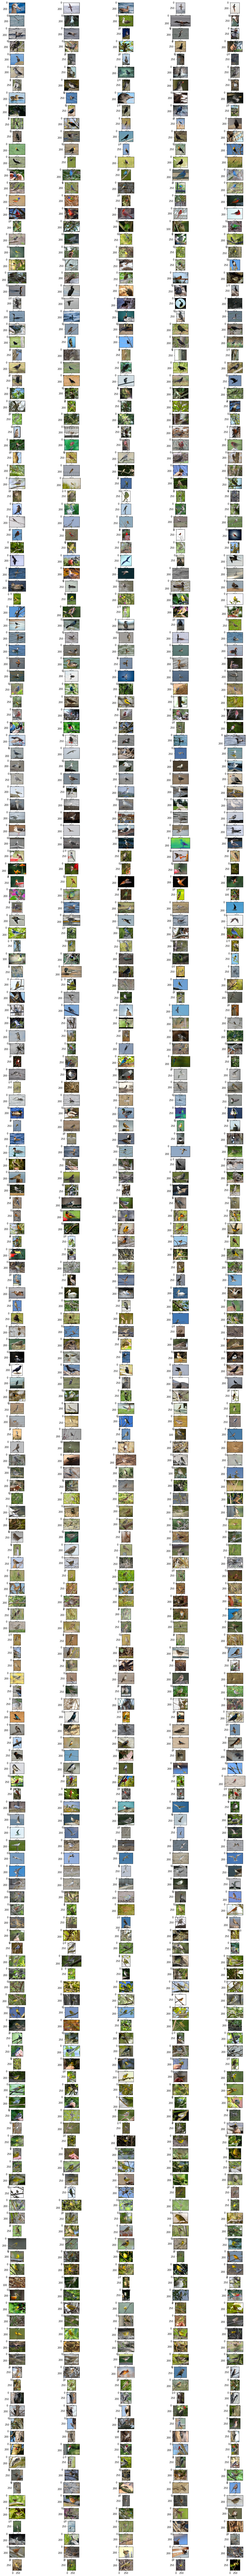

In [ ]:
fig, axarr = plt.subplots(200, 5, figsize=(20,200))

for i in range(200):
  indicies = np.where(np.reshape(y,(len(y),1))==(i+1))
  for j in range(5):
    image = x[indicies[0][j]]
    axarr[i,j].imshow(image)

## Part 1. Perceptron 
For this section you will implement a fully connected neural network (multi-layer perceptron). To do this you will need to perform the following steps:
- Resize the images to be no larger than 32x32.
- Use the sequential model API in keras to build your network using dense layers (consider performance impacts of fully connected layers)
- You must decide an appropriate number of neurons and layers.
- Print a summary of your model configuration. 



In [ ]:
# Write your FC network code here
model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(3072,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2048, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(200, activation='softmax'))

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 3072)              0         
                                                                 
 dense_24 (Dense)            (None, 3072)              9440256   
                                                                 
 batch_normalization_20 (Bat  (None, 3072)             12288     
 chNormalization)                                                
                                                                 
 dropout_20 (Dropout)        (None, 3072)              0         
                                                                 
 dense_25 (Dense)            (None, 2048)              6293504   
                                                                 
 batch_normalization_21 (Bat  (None, 2048)             8192      
 chNormalization)                                     

In [ ]:
fcn_results=model.fit(training, epochs=epoch_num, batch_size=batch,validation_data=(validation))

Epoch 1/50
148/148 [==============================] - 36s 215ms/step - loss: 6.0212 - accuracy: 0.0065 - val_loss: 7.1345 - val_accuracy: 0.0047
Epoch 2/50
148/148 [==============================] - 16s 105ms/step - loss: 5.7099 - accuracy: 0.0072 - val_loss: 5.3020 - val_accuracy: 0.0093
Epoch 3/50
148/148 [==============================] - 16s 108ms/step - loss: 5.5296 - accuracy: 0.0098 - val_loss: 5.2016 - val_accuracy: 0.0076
Epoch 4/50
148/148 [==============================] - 16s 106ms/step - loss: 5.4355 - accuracy: 0.0084 - val_loss: 5.1485 - val_accuracy: 0.0102
Epoch 5/50
148/148 [==============================] - 16s 108ms/step - loss: 5.3404 - accuracy: 0.0121 - val_loss: 5.0933 - val_accuracy: 0.0161
Epoch 6/50
148/148 [==============================] - 16s 108ms/step - loss: 5.2154 - accuracy: 0.0127 - val_loss: 5.0267 - val_accuracy: 0.0161
Epoch 7/50
148/148 [==============================] - 16s 108ms/step - loss: 5.0966 - accuracy: 0.0197 - val_loss: 4.9804 - val_ac

In [ ]:
model.save_weights("mlp_weights")

C:\Users\Mennatallah\AppData\Local\Temp\ipykernel_28900\1539543736.py:13: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True)


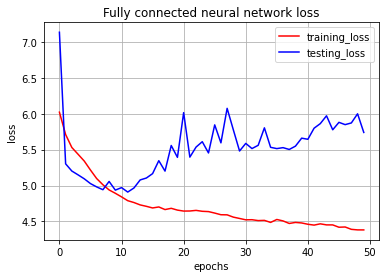

In [ ]:
training_loss = fcn_results.history['loss']
testing_loss=fcn_results.history['val_loss']
training_loss = np.reshape(training_loss, (epoch_num,1))
testing_loss = np.reshape(testing_loss, (epoch_num,1))

plt.plot(range(epoch_num),training_loss,color = 'red' ,label = "training_loss")
plt.plot(range(epoch_num),testing_loss,color = 'blue', label = "testing_loss")

plt.title("Fully connected neural network loss")
plt.xlabel('epochs')
plt.ylabel('loss')

plt.grid(b=True)
plt.legend()
plt.show()

C:\Users\Mennatallah\AppData\Local\Temp\ipykernel_28900\3474382579.py:13: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True)


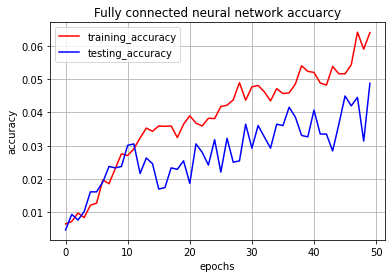

In [ ]:
training_acc = fcn_results.history['accuracy']
testing_acc=fcn_results.history['val_accuracy']
training_acc = np.reshape(training_acc, (epoch_num,1))
testing_acc = np.reshape(testing_acc, (epoch_num,1))

plt.plot(range(epoch_num),training_acc,color = 'red' ,label = "training_accuracy")
plt.plot(range(epoch_num),testing_acc,color = 'blue', label = "testing_accuracy")

plt.title("Fully connected neural network accuarcy")
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.grid(b=True)
plt.legend()
plt.show()

As seen from the output the accuracy is very low this mainly due to the use of neural network as they don not consider the spatial informations of the tensors and also due to the vanishing gradient
The layers where chosen to start from the input size and decrease till the output also dropout was used to handle the overfitting and also batch normalization was used to improve the accuracy


## Part 2. ResNet-101

For this section you will adapt the ResNet-101 network for the current task using tranfer learning and fine-tuning. You will implement the following in your process:
- You should choose a suitable image size.
- Choose a suitable labelling scheme.
- Use the pretrained ResNet-101 network available in Keras.
- Remove the top fully connected layers. Include your own FC layers that match our dataset.
- Choose some layers to "freeze" and the remaining layers you will fine-tune with the new dataset.

### Step 1
You will use the above steps to train a ResNet-101 model using the Bird dataset
- Use transfer learning to train your first model by removing the FC layers, but leaving the other layers intact.
- Plot a loss curve for training and test data
- Plot an accuracy curve for training and test data

### Step 2
Now use the same steps as above, but this time unfreeze some convolutional layers and retrain the network. Again, plot your results.

### Step 3
Discuss the results of both methods from step 1 and step 2 while using plots and graphics to support your discussion.


### All layers freezed 

In [ ]:
resnet_model=tf.keras.applications.resnet.ResNet101(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3),
    pooling='avg' ,
)

In [ ]:
for layer in resnet_model.layers:
    layer.trainable = False

In [ ]:
resnet_model.summary()

Model: "resnet101"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                          

In [ ]:
resnet_transfer = Sequential()
resnet_transfer.add(resnet_model)
resnet_transfer.add(Dense(200, activation='softmax'))

In [ ]:
resnet_transfer.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101 (Functional)      (None, 2048)              42658176  
                                                                 
 dense (Dense)               (None, 200)               409800    
                                                                 
Total params: 43,067,976
Trainable params: 409,800
Non-trainable params: 42,658,176
_________________________________________________________________


In [ ]:
resnet_transfer.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

In [ ]:
res_transfer_op=resnet_transfer.fit(training_res, epochs=epoch_num, batch_size=batch,validation_data=validation_res)

Epoch 1/20
148/148 [==============================] - 869s 6s/step - loss: 5.1835 - accuracy: 0.0307 - val_loss: 4.6319 - val_accuracy: 0.0641
Epoch 2/20
148/148 [==============================] - 806s 5s/step - loss: 4.1457 - accuracy: 0.1478 - val_loss: 3.9441 - val_accuracy: 0.1697
Epoch 3/20
148/148 [==============================] - 812s 5s/step - loss: 3.4666 - accuracy: 0.2831 - val_loss: 3.4793 - val_accuracy: 0.2512
Epoch 4/20
148/148 [==============================] - 819s 6s/step - loss: 2.9831 - accuracy: 0.3968 - val_loss: 3.1534 - val_accuracy: 0.3161
Epoch 5/20
148/148 [==============================] - 808s 5s/step - loss: 2.6248 - accuracy: 0.4745 - val_loss: 2.9106 - val_accuracy: 0.3500
Epoch 6/20
148/148 [==============================] - 810s 5s/step - loss: 2.3448 - accuracy: 0.5345 - val_loss: 2.7322 - val_accuracy: 0.3852
Epoch 7/20
148/148 [==============================] - 803s 5s/step - loss: 2.1232 - accuracy: 0.5838 - val_loss: 2.5945 - val_accuracy: 0.4048

In [ ]:
resnet_transfer.save_weights("res_weights")

C:\Users\Mennatallah\AppData\Local\Temp\ipykernel_19356\3846145450.py:13: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True)


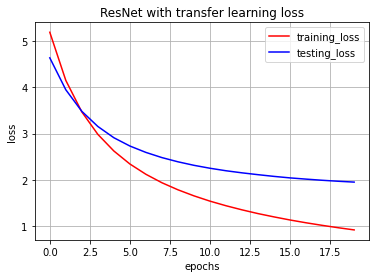

In [ ]:
training_loss = res_transfer_op.history['loss']
testing_loss=res_transfer_op.history['val_loss']
training_loss = np.reshape(training_loss, (epoch_num,1))
testing_loss = np.reshape(testing_loss, (epoch_num,1))

plt.plot(range(epoch_num),training_loss,color = 'red' ,label = "training_loss")
plt.plot(range(epoch_num),testing_loss,color = 'blue', label = "testing_loss")

plt.title("ResNet with transfer learning loss")
plt.xlabel('epochs')
plt.ylabel('loss')

plt.grid(b=True)
plt.legend()
plt.show()

C:\Users\Mennatallah\AppData\Local\Temp\ipykernel_19356\214157358.py:13: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True)


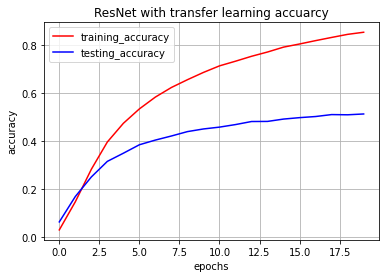

In [ ]:
training_acc = res_transfer_op.history['accuracy']
testing_acc=res_transfer_op.history['val_accuracy']
training_acc = np.reshape(training_acc, (epoch_num,1))
testing_acc = np.reshape(testing_acc, (epoch_num,1))

plt.plot(range(epoch_num),training_acc,color = 'red' ,label = "training_accuracy")
plt.plot(range(epoch_num),testing_acc,color = 'blue', label = "testing_accuracy")

plt.title("ResNet with transfer learning accuarcy")
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.grid(b=True)
plt.legend()
plt.show()

In [ ]:
res_eval_224 = model_transfer_224.evaluate(x_test_reshaped_res, y_test) 

As observed from the output the accuracy and the loss have improved greatly this mainly due to the use of Convolutional layers that it is better fit in dealing with images as it preserve the images as it preserves their spatial information also using a predefined pretraind model on several classes and using its weights helped in saving both time and computational power and helped in improving the accuracy
Also the use of RES-nrt specifically helped in solving the problem of the vanishing gradient

### Fine Tunning ResNet-101

In [ ]:
#Write your ResNet-101 code here
resnet_model_fine=tf.keras.applications.resnet.ResNet101(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3),
    pooling='avg',
)

In [ ]:
resnet_model_fine.summary()

Model: "resnet101"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                          

In [ ]:
counter = 0
for layer in resnet_model_fine.layers:
  if (isinstance(layer, keras.layers.Conv2D)):
    if counter % 3 == 0:
      counter += 1
      layer.trainable = True
    else:  
      counter += 1
      layer.trainable = False
  else:
    layer.trainable = False

In [ ]:
resnet_transfer_tune = Sequential()
resnet_transfer_tune.add(resnet_model_fine)
resnet_transfer_tune.add(Dense(200, activation='softmax'))

In [ ]:
resnet_transfer_tune.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101 (Functional)      (None, 2048)              42658176  
                                                                 
 dense_3 (Dense)             (None, 200)               409800    
                                                                 
Total params: 43,067,976
Trainable params: 13,857,352
Non-trainable params: 29,210,624
_________________________________________________________________


In [ ]:
resnet_transfer_tune.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

In [ ]:
res_transfer_tune_op=resnet_transfer_tune.fit(training_res,  epochs=epoch_num, batch_size=batch,validation_data=(validation_res))

Epoch 1/20
148/148 [==============================] - 1315s 9s/step - loss: 4.4397 - accuracy: 0.0959 - val_loss: 2.6701 - val_accuracy: 0.3216
Epoch 2/20
148/148 [==============================] - 1307s 9s/step - loss: 1.8589 - accuracy: 0.4949 - val_loss: 1.7582 - val_accuracy: 0.5252
Epoch 3/20
148/148 [==============================] - 1294s 9s/step - loss: 0.8741 - accuracy: 0.7430 - val_loss: 1.6517 - val_accuracy: 0.5825
Epoch 4/20
148/148 [==============================] - 1307s 9s/step - loss: 0.4233 - accuracy: 0.8750 - val_loss: 1.6510 - val_accuracy: 0.6029
Epoch 5/20
148/148 [==============================] - 1308s 9s/step - loss: 0.2058 - accuracy: 0.9408 - val_loss: 1.7902 - val_accuracy: 0.5944
Epoch 6/20
148/148 [==============================] - 1308s 9s/step - loss: 0.1360 - accuracy: 0.9618 - val_loss: 1.7689 - val_accuracy: 0.6254
Epoch 7/20
148/148 [==============================] - 1318s 9s/step - loss: 0.1095 - accuracy: 0.9681 - val_loss: 1.9018 - val_accuracy:

In [ ]:
resnet_transfer_tune.save_weights("res_weights_tune")

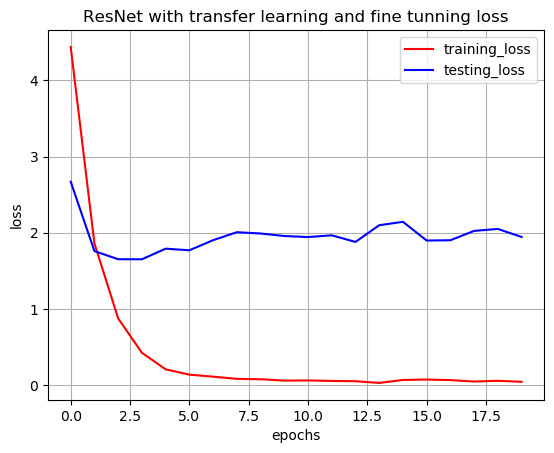

In [ ]:
training_loss = res_transfer_tune_op.history['loss']
testing_loss=res_transfer_tune_op.history['val_loss']
training_loss = np.reshape(training_loss, (epoch_num,1))
testing_loss = np.reshape(testing_loss, (epoch_num,1))

plt.plot(range(epoch_num),training_loss,color = 'red' ,label = "training_loss")
plt.plot(range(epoch_num),testing_loss,color = 'blue', label = "testing_loss")

plt.title("ResNet with transfer learning and fine tunning loss")
plt.xlabel('epochs')
plt.ylabel('loss')

plt.grid(b=True)
plt.legend()
plt.show()

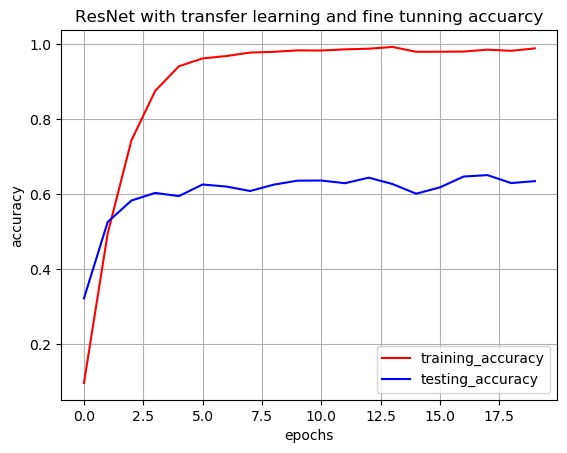

In [ ]:
training_acc = res_transfer_tune_op.history['accuracy']
testing_acc=res_transfer_tune_op.history['val_accuracy']
training_acc = np.reshape(training_acc, (epoch_num,1))
testing_acc = np.reshape(testing_acc, (epoch_num,1))

plt.plot(range(epoch_num),training_acc,color = 'red' ,label = "training_accuracy")
plt.plot(range(epoch_num),testing_acc,color = 'blue', label = "testing_accuracy")

plt.title("ResNet with transfer learning and fine tunning accuarcy")
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.grid(b=True)
plt.legend()
plt.show()

In [ ]:
resnet_transfer_tune.load_weights("res_weights_tune")

As observed that accuracy and the loss have been more improved when the Some of the convloutional layers where fitted on our data as trainning the layers on the specified data helped the model to easily recognize the pictures from the data
the trained layers chosen as to have train the last convloutional layer from each block

## Part 3. Visualization 
For this section you will visualize the filters learned byyour ResNet-101 network and use t-SNE to observe clusters that were learned by your model.
- Make sure to provide the graphic results for your visualizations
- Provide an interpretation of the results


### Filters

In [ ]:
resnet_transfer_tune.layers

In [ ]:
counter = 0
filters=[]
biases=[]
for layer in resnet_transfer_tune.layers[0].layers:
  if (isinstance(layer, tf.keras.layers.Conv2D)):
    if counter % 3 == 0:
      filter , bias =layer.get_weights()
      # normalize filter values to 0-1 so we can visualize them
      f_min, f_max = filter.min(), filter.max()
      filter = (filter - f_min) / (f_max - f_min)
      filters.append(filter)
      biases.append(bias)
    counter += 1


In [ ]:
for filter in filters:
  print(np.shape(filter))

(7, 7, 3, 64)
(1, 1, 64, 256)
(3, 3, 64, 64)
(3, 3, 64, 64)
(3, 3, 128, 128)
(1, 1, 512, 128)
(1, 1, 512, 128)
(1, 1, 512, 128)
(1, 1, 512, 256)
(1, 1, 256, 1024)
(1, 1, 256, 1024)
(1, 1, 256, 1024)
(1, 1, 256, 1024)
(1, 1, 256, 1024)
(1, 1, 256, 1024)
(1, 1, 256, 1024)
(1, 1, 256, 1024)
(1, 1, 256, 1024)
(1, 1, 256, 1024)
(1, 1, 256, 1024)
(1, 1, 256, 1024)
(1, 1, 256, 1024)
(1, 1, 256, 1024)
(1, 1, 256, 1024)
(1, 1, 256, 1024)
(1, 1, 256, 1024)
(1, 1, 256, 1024)
(1, 1, 256, 1024)
(1, 1, 256, 1024)
(1, 1, 256, 1024)
(1, 1, 256, 1024)
(1, 1, 256, 1024)
(1, 1, 1024, 2048)
(3, 3, 512, 512)
(3, 3, 512, 512)


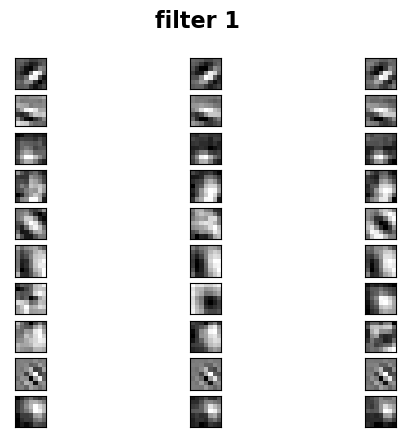

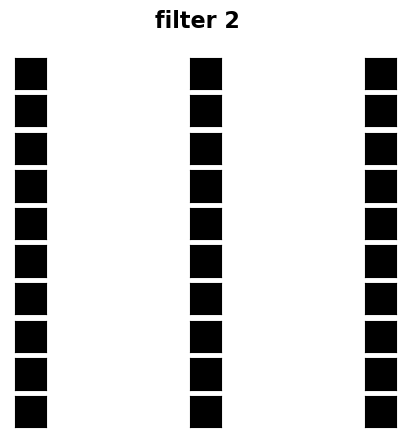

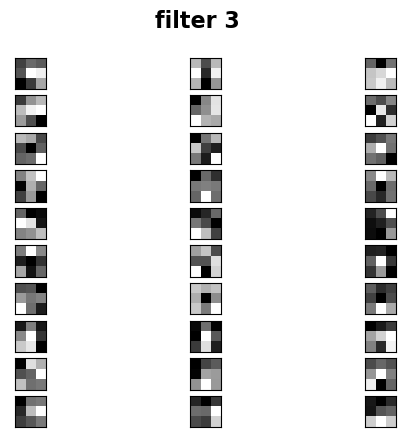

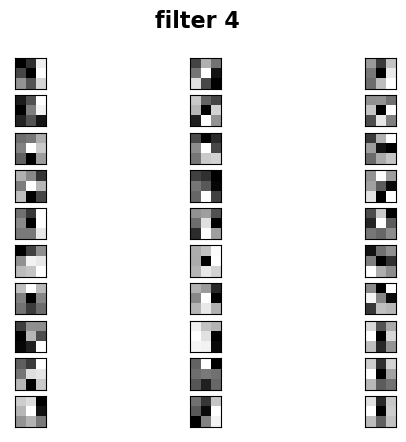

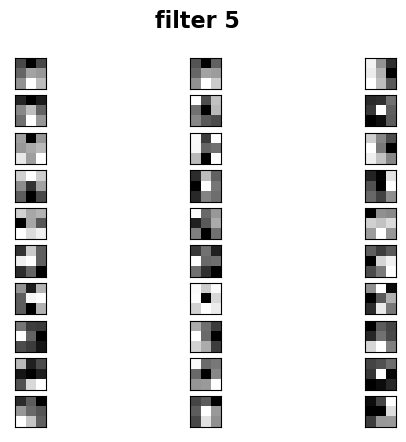

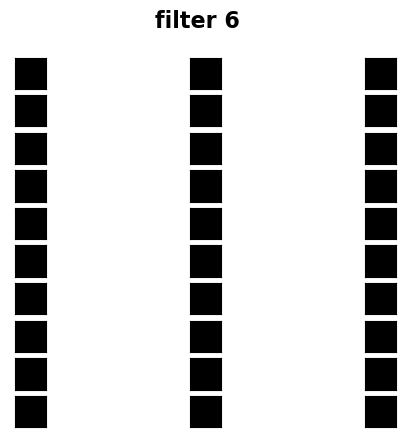

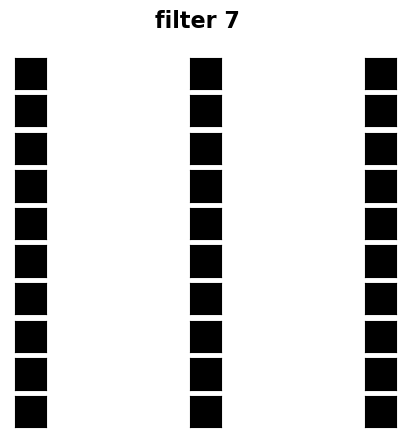

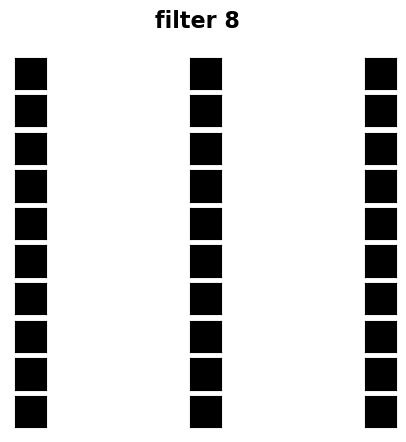

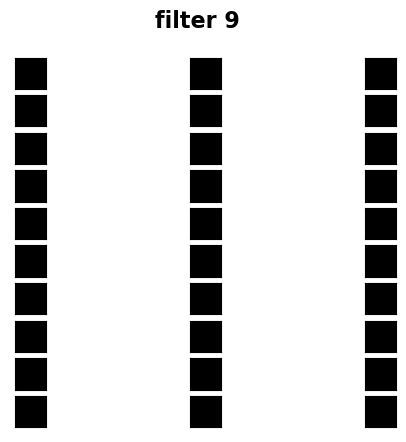

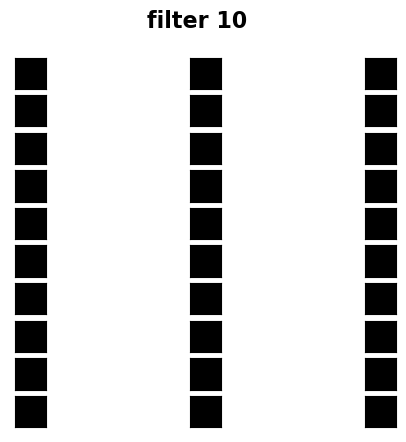

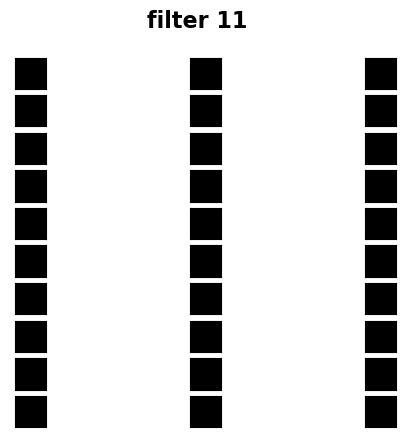

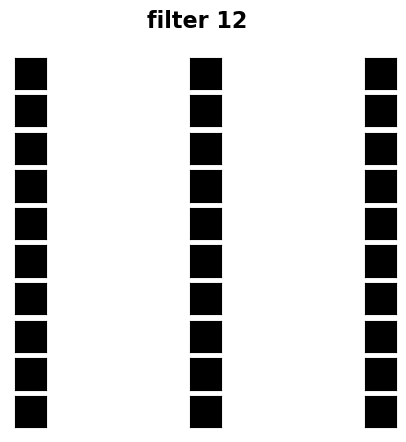

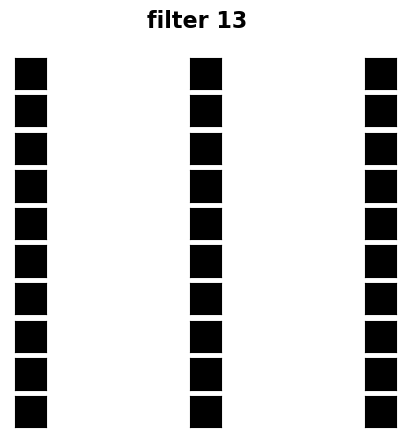

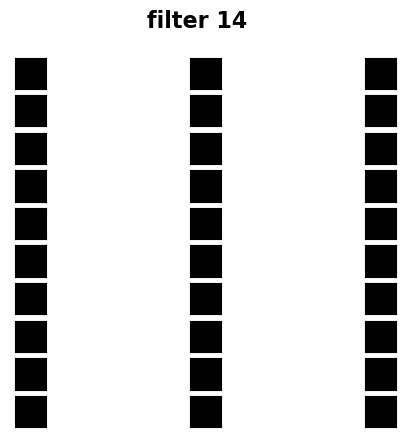

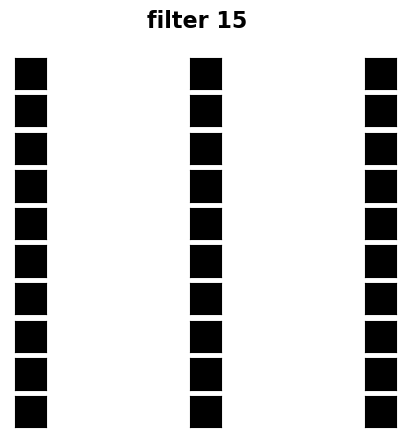

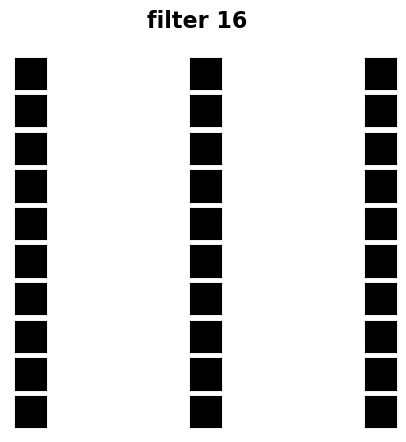

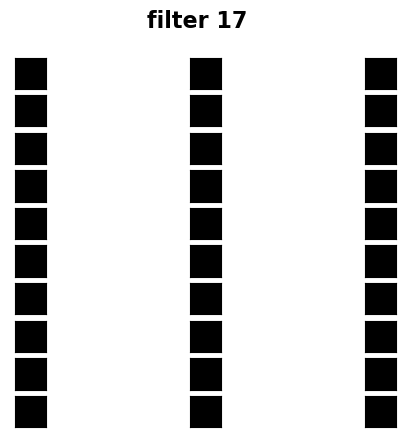

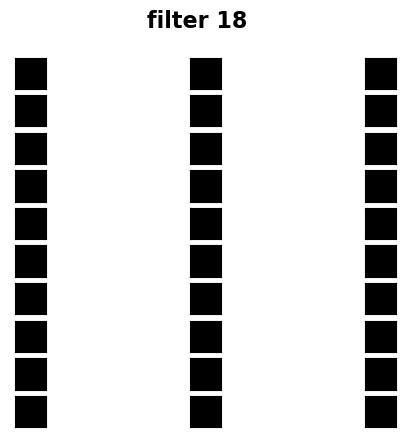

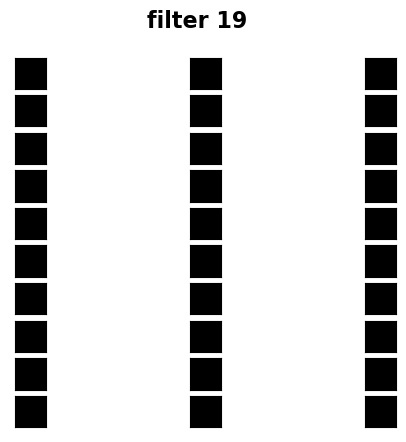

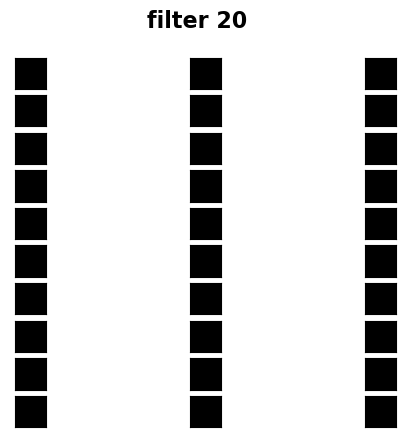

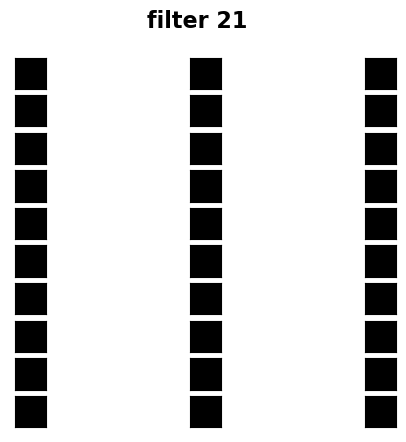

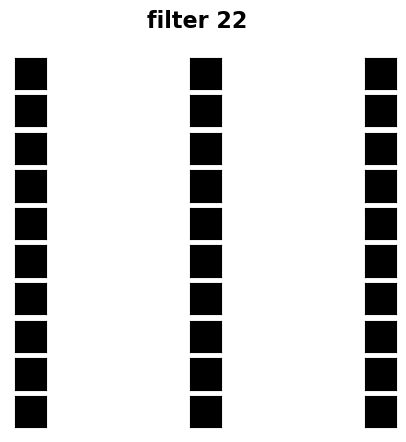

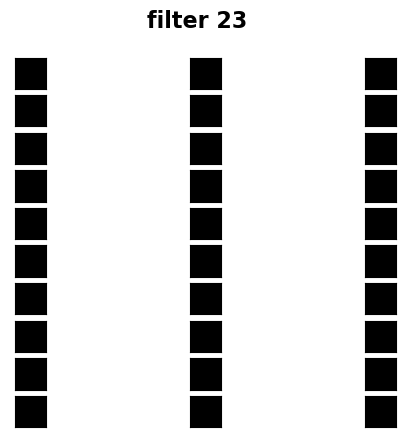

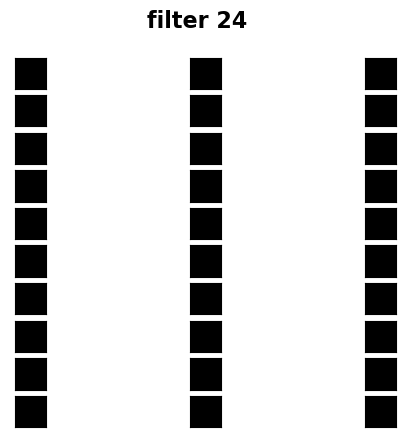

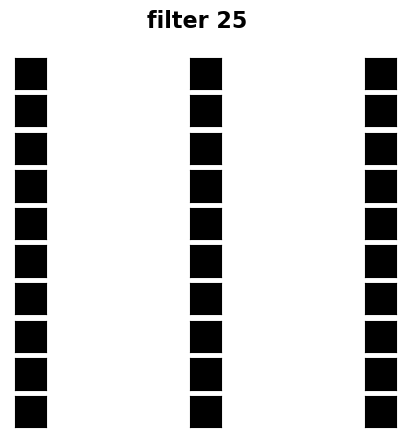

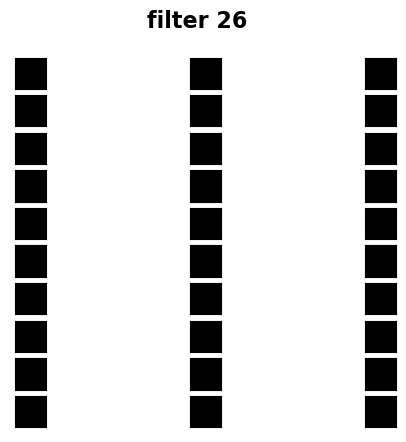

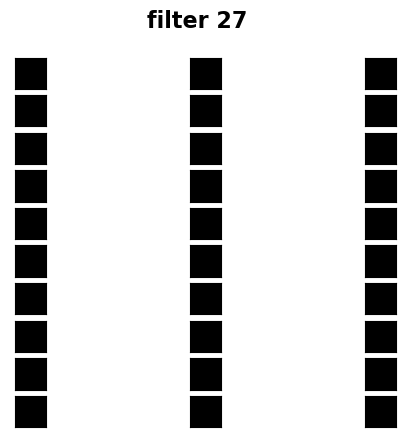

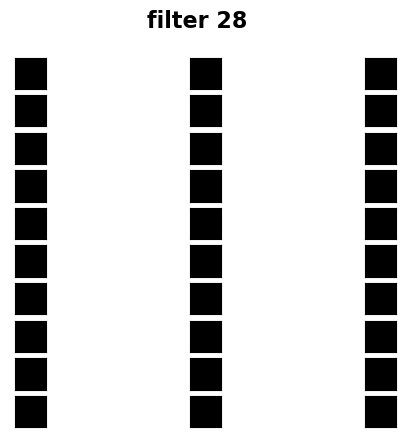

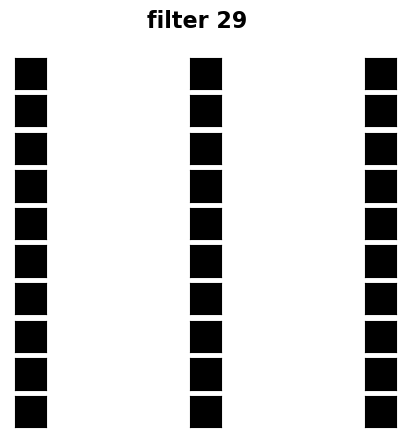

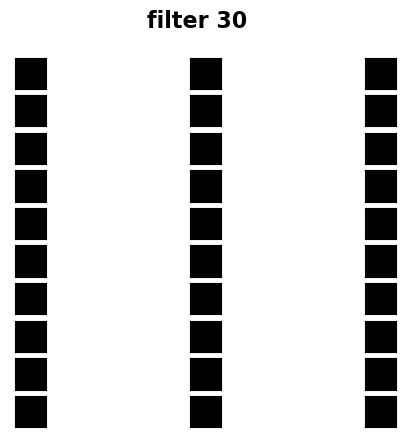

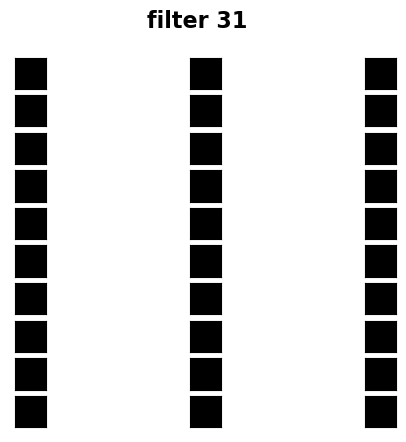

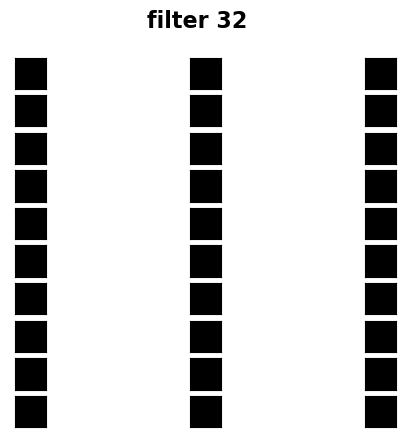

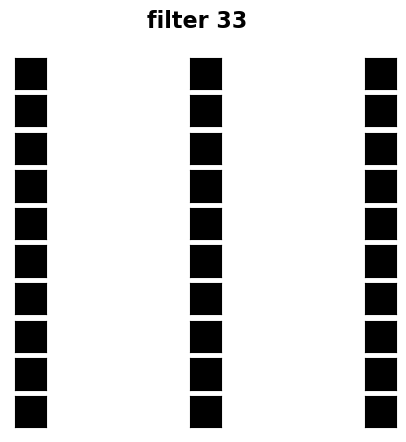

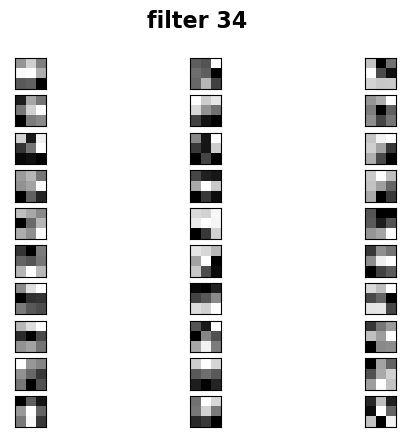

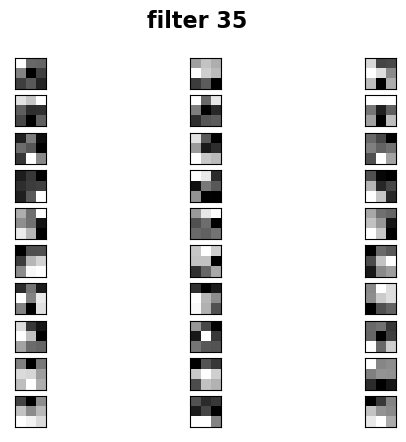

In [ ]:
# Write your visualization code here.
# plot first few filters
n_filters, ix = 10, 1
filter_no = 1
for filter in filters:
  ix =1
  fig = plt.figure()
  fig.suptitle('filter %i' %(filter_no),fontweight ="bold",fontsize='16')
  for i in range(n_filters):
    # get the filter
    f = filter[:, :, :, i]
    
    # plot each channel separately
    for j in range(3):
      # specify subplot and turn of axis
      ax = plt.subplot(n_filters, 3, ix)
      ax.set_xticks([])
      ax.set_yticks([])
      # plot filter channel in grayscale
      plt.imshow(f[:, :, j], cmap='gray')
      ix += 1
  # show the figure 
  plt.show()
  filter_no += 1

As observed that the Conv layers with dimensions (1*1) are totally black as they are not used to detect any feature but they are mainly used to decrease the depth to save the computational power and the filters holding feature are more cocentrated at the top and the end blocks as they help the model to extract features to be further analysed through out the model or return it to the pictures

### TSNE

In [ ]:
model = keras.models.Sequential()
intermediate_layer_model = tf.keras.models.Model(inputs = resnet_transfer_tune.layers[0].input, outputs = resnet_transfer_tune.get_layer(index=-2).output)
intermediate_output = intermediate_layer_model.predict(validation_res)

37/37 [==============================] - 93s 2s/step


In [ ]:
intermediate_output

array([[5.77340841e+00, 1.65091157e+00, 0.00000000e+00, ...,
        1.09436238e+00, 0.00000000e+00, 2.38597021e-01],
       [1.09477997e+01, 3.51604074e-01, 0.00000000e+00, ...,
        5.78440142e+00, 0.00000000e+00, 5.13960375e-03],
       [6.31043863e+00, 1.82450503e-01, 5.39485307e-04, ...,
        5.77392626e+00, 6.05832338e-01, 8.72998524e+00],
       ...,
       [1.43575624e-01, 1.15895644e-01, 4.35446548e+00, ...,
        8.38981450e-01, 4.99953806e-01, 3.09940994e-01],
       [6.71306014e-01, 1.21794902e-01, 9.78792548e-01, ...,
        5.84513712e+00, 3.66113454e-01, 1.91640809e-01],
       [4.52541876e+00, 1.20724046e+00, 2.98657227e+00, ...,
        2.32619166e+00, 5.11026084e-01, 0.00000000e+00]], dtype=float32)

In [ ]:
tsne= TSNE().fit_transform(intermediate_output)

/home/team5/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/team5/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(2357, 2)

Text(0.5, 1.0, 'TSNE plot')

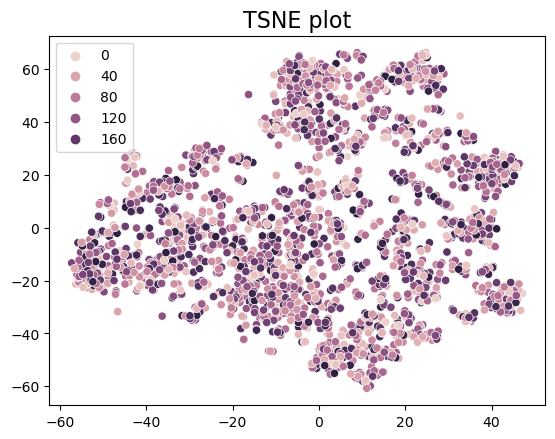

In [ ]:
sns.scatterplot(x = tsne[:,0], y = tsne[:,1], 
                hue = y_labels, style = y_labels)
plt.title('TSNE plot', size=16)

/home/team5/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/team5/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Text(0.5, 1.0, 'TSNE Train data plot')

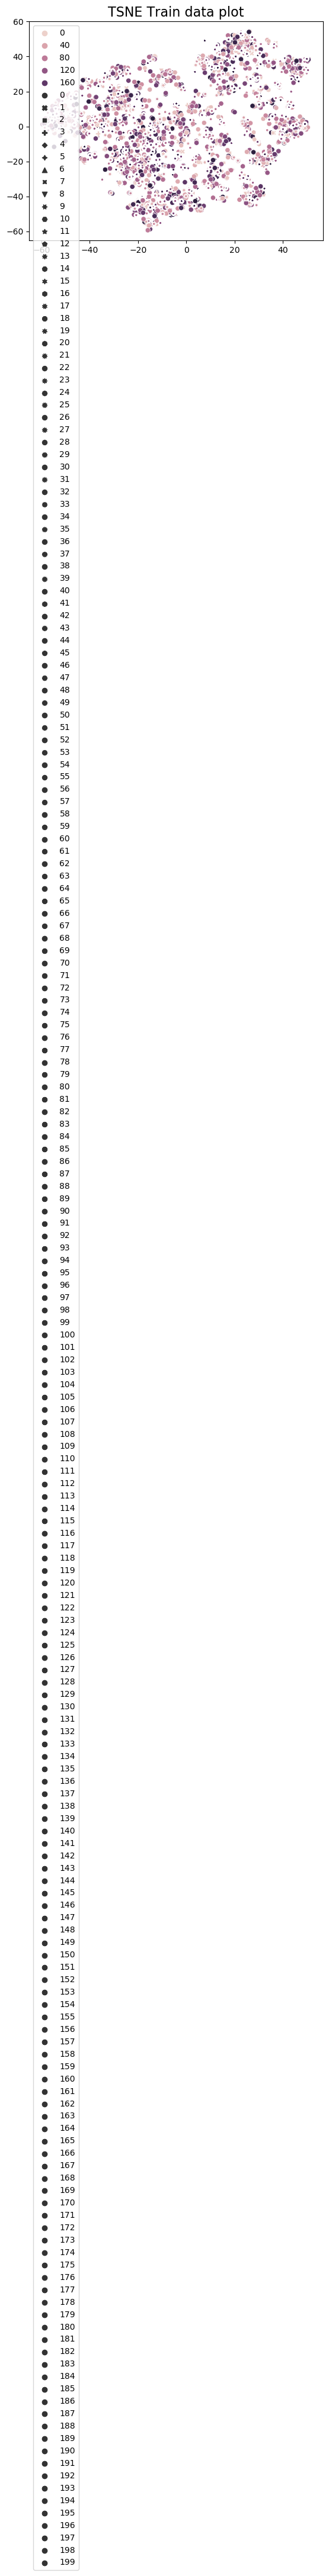

In [ ]:
tsne_train= TSNE().fit_transform(intermediate_output)
sns.scatterplot(x = tsne_train[:,0], y = tsne_train[:,1], 
                hue = y_labels_train, style = y_labels_train)
plt.title('TSNE Train data plot', size=16)

Discuss here.